In [ ]:
import scanpy as sc
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import pickle
import sys
sys.path.append("../../../Benchmark/")
from benchmarker import Benchmarker

In [ ]:
import os
os.chdir("../../../datatset/DLPFC/")

Prepare data

In [3]:
files = ["151675", "151676"]
adatas = [sc.read_visium(i) for i in files]
metas = [pd.read_csv(f"{i}/metadata.tsv", sep="\t") for i in files]

In [4]:
for i in range(len(files)):
    adatas[i].obs["cell_type"] = [str(j) for j in list(metas[i]["layer_guess"])]
    # adatas[i].obs["cell_type"] = list(metas[i]["layer_guess"])


    adatas[i].obs["batch"] = files[i]
    adatas[i].var_names_make_unique()
    adatas[i].obs_names_make_unique()
    adatas[i].obs_names = [j+f"_{i}" for j in adatas[i].obs_names]

In [5]:
adatas

[AnnData object with n_obs × n_vars = 3592 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'cell_type', 'batch'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 3460 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'cell_type', 'batch'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial']

In [45]:
# concat = sc.concat(adatas)
# concat.obs["spatial1"] =  list(concat.obsm["spatial"][:,0])
# concat.obs["spatial2"] =  list(concat.obsm["spatial"][:,1])

In [46]:
# concat = concat[~concat.obs["cell_type"].isin(["nan"])]

In [47]:
# concat.write("DLPFC_diff_slice.h5ad")

In [48]:
bm = Benchmarker(R_conda_env="Rbase")

In [49]:
# bm.test(methods=["Unintegrated"])

In [50]:
# bm.h5ad2rds(in_file=concat, out_file="DLPFC_diff_slice.rds", verbose=True)

Run all method

In [ ]:
# bm.run(RDS_file_path="DLPFC_diff_slice.rds", H5AD_file_path="DLPFC_diff_slice.h5ad",
#        save_path="../../../result/DLPFC/diff_slice/embed/", 
#        n_cluster=7, verbose=True, workers=4, cluster_method="mclust", methods=["spaVAE"])

Evaluate

In [52]:
adata = sc.read_h5ad("DLPFC_diff_slice.h5ad")

In [53]:
# res_dict = bm.read_result("../../result/DLPFC/diff_slice/embed/", 
#                           index=list(adata.obs_names), 
#                           save="../../result/DLPFC/diff_slice/embed_dict.pkl",
#                           methods=bm.all_methods + ["STADIA"])

In [54]:
with open("../../result/DLPFC/diff_slice/embed_dict.pkl", "rb") as f:
    res_dict = pickle.load(f)

In [55]:
# metrics = bm.cal_metrics(adata=adata, batch_key="batch", label_key="cell_type",
#                          res_dict=res_dict, methods="all", verbose=True, rep=1,
#                          min_max_scale=False, save="../../result/DLPFC/diff_slice/metrics.pkl")

In [56]:
with open("../../result/DLPFC/diff_slice/metrics.pkl", "rb") as f:
    metrics = pickle.load(f)

In [ ]:
bm.set_plot_params(params_dict={"figure.dpi": 300}, font_file_path="./Helvetica.ttf")

2025-09-01 19:05:37 - INFO - Custom font 'Helvetica' has been set


In [ ]:
save_dir = "../../../figures/DLPFC_diff_slice/"

In [59]:
# bm.plot_heatmap(metric_df=metrics[0], save=f"{save_dir}/summary_heatmap.pdf")

In [60]:
from benchmarker import split_adata, transform_coord
import numpy as np
spatial = [ad.obsm["spatial"] for ad in split_adata(adata)]
spatial = transform_coord(spatial, vertical=True, axis="y")

In [61]:
bg_dict = {i:"#D4B483" if i in bm.spatial_methods else "#5873a4" for i in bm.all_methods }
bg_dict["STADIA"] = "#5873a4"

2025-09-01 19:05:37 - INFO - `color_map` is None, using default color_map based on `category_lst`


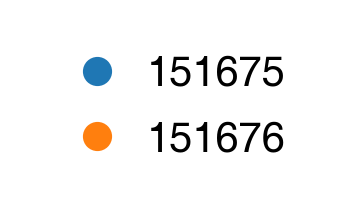

In [62]:
bm.plot_legend(category_lst=adata.obs["batch"], marker="o", ncol=1, save=f"{save_dir}/batch_legend.pdf")

In [63]:
# bm.plot_legend(category_lst=list(range(7)), marker="o", ncol=3, save=f"{save_dir}/cluster_legend.pdf")

In [64]:
# bm.plot_legend(category_lst=adata.obs["cell_type"], marker="o", ncol=2, save=f"{save_dir}/annot_legend.pdf")

In [65]:
# bm.plot_spatial(spatial=spatial, label_dict={"annot": np.array(adata.obs["cell_type"]).reshape(-1,1)},
#                 figsize=(2, 4), frameon=True, inner_gs_row=2, inner_gs_col=1, size=8, ncol=1,
#                 xlabel=["Annotation"], ylabel=["151675", "151676"], only_show_left=True,
#                 axis_width = 1.2, axis_color="lightgrey",
#                 outer_row_hspace=0.15, outer_col_wspace=0.1,
#                 background_color = lambda x: bg_dict[x] if x in bg_dict else None,
#                 xlabel_pad=0.015,
#                 save=None)#f"{save_dir}/annot_spatial_plot.pdf")

In [66]:
from benchmarker import get_scatter_cmap
palette = get_scatter_cmap([str(i) for i in list(range(7))])

In [69]:
# bm.plot_spatial(spatial=spatial, label_dict=res_dict["Cluster"],
#                 figsize=(16, 14), frameon=True, inner_gs_row=1, inner_gs_col=2, size=8, ncol=3,
#                 xlabel=["151675","151676"], ylabel="name", only_show_left=False, only_show_top=True,
#                 axis_width = 1.2, axis_color="lightgrey",
#                 # order=["DeepST", "spaVAE", "BASS", "SPIRAL", "scVI", "Harmony", "LIGER"],
#                 outer_row_hspace=0.05, outer_col_wspace=0.25,
#                 background_color = lambda x: bg_dict[x] if x in bg_dict else None,
#                 xlabel_pad=0.015, palette=palette, save_dpi=600,
#                 save=f"{save_dir}/all_spatial.png")

In [70]:
# bm.plot_umap(embed_dict=res_dict["UMAP"], batch_dict=res_dict["Batch"], annot_list=list(adata.obs["cell_type"]), 
#              figsize=(16, 16), frameon=True, inner_gs_row=1, inner_gs_col=2, size=2, ncol=3,
#              ylabel="name", only_show_top=True,  xlabel=["Batch", "Cell type"], only_show_left=False,
#              background_color = lambda x: bg_dict[x] if x in bg_dict else None,
#             #  order=["Unintegrated", "DeepST", "spaVAE", "BASS", "SPIRAL", "scVI", "Harmony", "LIGER"],
#              axis_width=1.2, axis_color="lightgrey",
#              outer_col_wspace=0.18, save_dpi=600,
#              ylabel_pad=0.018, xlabel_pad=0.015, merge=True, merge_margin_size=0.4,
#              save=f"{save_dir}/all_umap.png")